In [47]:
import pandas as pd
import json
from pandas import json_normalize
import numpy as np
from pandasql import sqldf


In [48]:
#Loading the json files
r = pd.read_json('C:\\Users\\Karthoz\\OneDrive\\Documents\\FETCH\\receipts11\\receipts.json', lines=True)
u = pd.read_json('C:\\Users\\Karthoz\\OneDrive\\Documents\\FETCH\\users11\\users.json', lines=True)
b = pd.read_json('C:\\Users\\Karthoz\\OneDrive\\Documents\\FETCH\\brands11\\brands.json', lines=True)


In [49]:
#Creating copies to clean the data
df1=r.copy()
df2=u.copy()
df3=b.copy()

In [50]:
print("receipts: ",df1.shape)
print("users: ",df2.shape)
print("brands: ",df3.shape)


receipts:  (1119, 15)
users:  (495, 7)
brands:  (1167, 8)


Cleaning the data to have in suitable format and removing nesting

In [51]:
#cleaning the data/ unnesting the columns
df1['id']=pd.json_normalize(df1['_id'])
df1['create_Date']=pd.json_normalize(df1['createDate'])
df1['date_Scanned']=pd.json_normalize(df1['dateScanned'])
df1['finished_Date']=pd.json_normalize(df1['finishedDate'])
df1['modify_Date']=pd.json_normalize(df1['modifyDate'])
df1['pointsAwarded_Date']=pd.json_normalize(df1['pointsAwardedDate'])
df1['purchase_Date']=pd.json_normalize(df1['purchaseDate'])

df1=df1.drop(['createDate','_id','dateScanned','finishedDate','pointsAwardedDate','purchaseDate','modifyDate'],axis=1)



In [52]:
df1.shape

(1119, 15)

In [53]:
rows = []

# Iterate through each row in the DataFrame
for index, row in df1.iterrows():
    # Get the rewardsReceiptItemList for the current row
    items_list = row['rewardsReceiptItemList']
   
    # If items_list is a list, create a row for each item
    if isinstance(items_list, list):
        for item in items_list:
            # Create a copy of the current row
            new_row = row.copy()
            # Update the rewardsReceiptItemList with the current item
            new_row['rewardsReceiptItemList'] = item
            # Append the new row to the list of rows
            rows.append(new_row)

# Create a new DataFrame from the list of rows
result_df = pd.DataFrame(rows)

# Display the size of resulting DataFrame, each row has each item
print(result_df.shape)


(6941, 15)


In [54]:
df_new = pd.json_normalize(result_df['rewardsReceiptItemList'])
df_new = df_new.rename(columns={'pointsEarned': 'pointsEarned_item'})


In [55]:
result_df.columns

Index(['bonusPointsEarned', 'bonusPointsEarnedReason', 'pointsEarned',
       'purchasedItemCount', 'rewardsReceiptItemList', 'rewardsReceiptStatus',
       'totalSpent', 'userId', 'id', 'create_Date', 'date_Scanned',
       'finished_Date', 'modify_Date', 'pointsAwarded_Date', 'purchase_Date'],
      dtype='object')

In [56]:
df_new.columns

Index(['barcode', 'description', 'finalPrice', 'itemPrice', 'needsFetchReview',
       'partnerItemId', 'preventTargetGapPoints', 'quantityPurchased',
       'userFlaggedBarcode', 'userFlaggedNewItem', 'userFlaggedPrice',
       'userFlaggedQuantity', 'needsFetchReviewReason',
       'pointsNotAwardedReason', 'pointsPayerId', 'rewardsGroup',
       'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned_item',
       'targetPrice', 'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId'],
      dtype='object')

In [57]:
#Final receipts table
df_new.reset_index(inplace=True, drop=True)
result_df.reset_index(inplace=True, drop=True)
receipts = pd.concat([result_df,df_new],axis=1)
receipts= receipts.drop(['rewardsReceiptItemList'],axis=1)
# receipts.columns.values[2] = 'pointsEarned_receipt'


In [58]:
receipts['create_Date'] = pd.to_datetime(receipts['create_Date'],unit='ms')
receipts['date_Scanned'] = pd.to_datetime(receipts['date_Scanned'],unit='ms')
receipts['finished_Date'] = pd.to_datetime(receipts['finished_Date'],unit='ms')
receipts['modify_Date'] = pd.to_datetime(receipts['modify_Date'],unit='ms')
receipts['pointsAwarded_Date'] = pd.to_datetime(receipts['pointsAwarded_Date'],unit='ms')
receipts['purchase_Date'] = pd.to_datetime(receipts['purchase_Date'],unit='ms')
receipts['modify_Date'] = pd.to_datetime(receipts['modify_Date'],unit='ms')


In [59]:
items = receipts[['id','barcode', 'description',
       'finalPrice', 'itemPrice', 'needsFetchReview', 'partnerItemId',
       'preventTargetGapPoints', 'quantityPurchased', 'userFlaggedBarcode',
       'userFlaggedNewItem', 'userFlaggedPrice', 'userFlaggedQuantity',
       'needsFetchReviewReason', 'pointsNotAwardedReason', 'pointsPayerId',
       'rewardsGroup', 'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned_item',
       'targetPrice', 'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId']]

In [60]:
receipts = receipts.drop(['barcode', 'description',
       'finalPrice', 'itemPrice', 'needsFetchReview', 'partnerItemId',
       'preventTargetGapPoints', 'quantityPurchased', 'userFlaggedBarcode',
       'userFlaggedNewItem', 'userFlaggedPrice', 'userFlaggedQuantity',
       'needsFetchReviewReason', 'pointsNotAwardedReason', 'pointsPayerId',
       'rewardsGroup', 'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned_item',
       'targetPrice', 'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId'],axis=1)

In [61]:
df2['id']=pd.json_normalize(df2['_id'])
df2['created_Date']=pd.json_normalize(df2['createdDate'])
df2['last_Login']=pd.json_normalize(df2['lastLogin'])
df2=df2.drop(['createdDate','_id','lastLogin'],axis=1)

df2.head()
df2['created_Date']=pd.to_datetime(df2['created_Date'],unit='ms')
df2['last_Login']=pd.to_datetime(df2['last_Login'],unit='ms')
users=df2.copy()
users.head()


,active,role,signUpSource,state,id,created_Date,last_Login
0,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858
1,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858
2,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858
3,True,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6,2021-01-03 15:25:30.554,2021-01-03 15:25:30.597
4,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858


In [62]:
df3.shape

(1167, 8)

In [63]:
df3['id']=pd.json_normalize(df3['_id'])
df_cpg=df3.cpg.apply(pd.Series)
df_cpg['$ref'].unique()  #we can delete this column as it has only 2 values and probably both are same and its typo 
df3['cpg_id']=pd.json_normalize(df_cpg['$id'])
df3['cpg_ref']=df_cpg['$ref']

df3 = df3.drop(['_id','cpg'],axis=1)
# df3.head()
brands=df3.copy()
brands.head()

,barcode,category,categoryCode,name,topBrand,brandCode,id,cpg_id,cpg_ref
0,511111019862,Baking,BAKING,test brand @1612366101024,0.0,NaN,601ac115be37ce2ead437551,601ac114be37ce2ead437550,Cogs
1,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,Cogs
2,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,Cogs
3,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,Cogs
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,Cogs


Creating Final tables : Rewards , Receipts, Users, Brands

In [64]:
# 
items['barcode'] = items['barcode'].astype(str)

brands['barcode']=brands['barcode'].astype(str)


In [65]:
users.columns

Index(['active', 'role', 'signUpSource', 'state', 'id', 'created_Date',
       'last_Login'],
      dtype='object')

In [66]:
brands.columns

Index(['barcode', 'category', 'categoryCode', 'name', 'topBrand', 'brandCode',
       'id', 'cpg_id', 'cpg_ref'],
      dtype='object')

In [67]:
items.columns

Index(['id', 'barcode', 'description', 'finalPrice', 'itemPrice',
       'needsFetchReview', 'partnerItemId', 'preventTargetGapPoints',
       'quantityPurchased', 'userFlaggedBarcode', 'userFlaggedNewItem',
       'userFlaggedPrice', 'userFlaggedQuantity', 'needsFetchReviewReason',
       'pointsNotAwardedReason', 'pointsPayerId', 'rewardsGroup',
       'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned_item',
       'targetPrice', 'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId'],
      dtype='object')

In [68]:
receipts.columns

Index(['bonusPointsEarned', 'bonusPointsEarnedReason', 'pointsEarned',
       'purchasedItemCount', 'rewardsReceiptStatus', 'totalSpent', 'userId',
       'id', 'create_Date', 'date_Scanned', 'finished_Date', 'modify_Date',
       'pointsAwarded_Date', 'purchase_Date'],
      dtype='object')

In [69]:
print("receipts: ",receipts.shape)
print("users: ",users.shape)
print("brands: ",brands.shape)
print("items: ",items.shape)


receipts:  (6941, 14)
users:  (495, 7)
brands:  (1167, 9)
items:  (6941, 35)


In [70]:
df_join = pd.merge(brands, items, on="barcode")
df_join.shape  #only 89 rows matched

(89, 43)


### 3. Data Quality 

In [71]:
receipts.info()
brands.info()
users.info()
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6941 entries, 0 to 6940
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   bonusPointsEarned        5978 non-null   float64       
 1   bonusPointsEarnedReason  5978 non-null   object        
 2   pointsEarned             6251 non-null   float64       
 3   purchasedItemCount       6892 non-null   float64       
 4   rewardsReceiptStatus     6941 non-null   object        
 5   totalSpent               6941 non-null   float64       
 6   userId                   6941 non-null   object        
 7   id                       6941 non-null   object        
 8   create_Date              6941 non-null   datetime64[ns]
 9   date_Scanned             6941 non-null   datetime64[ns]
 10  finished_Date            5967 non-null   datetime64[ns]
 11  modify_Date              6941 non-null   datetime64[ns]
 12  pointsAwarded_Date       6078 non-

In [72]:
print(receipts.describe())
print(items.describe())

       bonusPointsEarned  pointsEarned  purchasedItemCount   totalSpent  \
count        5978.000000   6251.000000         6892.000000  6941.000000   
mean          625.985781   2176.159782          240.939350  1369.563070   
min             5.000000      0.000000            0.000000     0.000000   
25%           750.000000    750.000000          103.000000   373.550000   
50%           750.000000   1447.000000          167.000000   776.790000   
75%           750.000000   2685.800000          335.000000  1183.100000   
max           750.000000  10199.800000          689.000000  4721.950000   
std           244.382994   2175.841796          221.791039  1589.106795   

                         create_Date                   date_Scanned  \
count                           6941                           6941   
mean   2021-01-20 17:28:11.781993728  2021-01-20 17:28:11.781993728   
min              2020-10-30 20:17:59            2020-10-30 20:17:59   
25%              2021-01-16 23:00:53    

In [73]:
print(receipts.describe(include='object'))
print(users.describe(include='object'))
print(brands.describe(include='object'))
print(items.describe(include='object'))

                                  bonusPointsEarnedReason  \
count                                                5978   
unique                                                  9   
top     Receipt number 1 completed, bonus point schedu...   
freq                                                 4605   

       rewardsReceiptStatus                    userId  \
count                  6941                      6941   
unique                    4                       246   
top                FINISHED  600f29a64329897eac239049   
freq                   5918                       459   

                              id  
count                       6941  
unique                       679  
top     600f2fc80a720f0535000030  
freq                         459  
            role signUpSource state                        id
count        495          447   439                       495
unique         2            2     8                       212
top     consumer        Email    WI  54943462e4

##### Missing Data

In [74]:
missing_values_receipts = receipts.isnull().sum()
print("Missing Values:")
print(missing_values_receipts)
missing_values_users = users.isnull().sum()
print("Missing Values:")
print(missing_values_users)
missing_values_brands = brands.isnull().sum()
print("Missing Values:")
print(missing_values_brands)
missing_values_items = items.isnull().sum()
print("Missing Values:")
print(missing_values_items)

Missing Values:
bonusPointsEarned          963
bonusPointsEarnedReason    963
pointsEarned               690
purchasedItemCount          49
rewardsReceiptStatus         0
totalSpent                   0
userId                       0
id                           0
create_Date                  0
date_Scanned                 0
finished_Date              974
modify_Date                  0
pointsAwarded_Date         863
purchase_Date               21
dtype: int64
Missing Values:
active           0
role             0
signUpSource    48
state           56
id               0
created_Date     0
last_Login      62
dtype: int64
Missing Values:
barcode           0
category        155
categoryCode    650
name              0
topBrand        612
brandCode       234
id                0
cpg_id            0
cpg_ref           0
dtype: int64
Missing Values:
id                                       0
barcode                                  0
description                            381
finalPrice           

In [75]:
# Percentage of missing values
missing_percent_receipts = receipts.isnull().mean() * 100
print("Missing Percentage in Receipts:\n", missing_percent_receipts)
missing_percent_items = items.isnull().mean() * 100
print("Missing Percentage in Items:\n", missing_percent_items)
missing_percent_brands = brands.isnull().mean() * 100
print("Missing Percentage in Brands:\n", missing_percent_brands)
missing_percent_users = users.isnull().mean() * 100
print("Missing Percentage in Users:\n", missing_percent_users)


Missing Percentage in Receipts:
 bonusPointsEarned          13.874082
bonusPointsEarnedReason    13.874082
pointsEarned                9.940931
purchasedItemCount          0.705950
rewardsReceiptStatus        0.000000
totalSpent                  0.000000
userId                      0.000000
id                          0.000000
create_Date                 0.000000
date_Scanned                0.000000
finished_Date              14.032560
modify_Date                 0.000000
pointsAwarded_Date         12.433367
purchase_Date               0.302550
dtype: float64
Missing Percentage in Items:
 id                                     0.000000
barcode                                0.000000
description                            5.489123
finalPrice                             2.506843
itemPrice                              2.506843
needsFetchReview                      88.286990
partnerItemId                          0.000000
preventTargetGapPoints                94.842242
quantityPurchased   

In [76]:
items['barcode'] = items['barcode'].fillna(0)

##### Duplicate rows 

In [94]:
#Duplicate records for users
users_duplicates = users.duplicated()
print('Duplicate users: ',users_duplicates.sum())
print('Unique users: ',users['id'].nunique())

#Duplicate records for brands
brands_duplicates = brands.duplicated()
print('Duplicate brands: ',brands_duplicates.sum())

Duplicate users:  283
Unique users:  212
Duplicate brands:  0


##### Consistency Checks

In [78]:
# Check userId consistency
missing_users = receipts[~receipts['userId'].isin(users['id'])]
print(f"Receipts with missing user references: {len(missing_users)}")


Receipts with missing user references: 2604


In [79]:
# Check brandId consistency in rewardsReceiptItemList

missing_brands = items[~items['barcode'].isin(brands['barcode'])]
print(f"Rewards items with missing brand references: {len(missing_brands)}")


Rewards items with missing brand references: 6859


#### Invalid data

In [92]:
#check for invalid date values
invalid_dates = receipts[receipts['purchase_Date'].isnull()]
print(f"Invalid purchase dates: {len(invalid_dates)}")

# Check for negative or zero totalSpent
invalid_spent = receipts[receipts['totalSpent'] <= 0]
print(f"Receipts with invalid totalSpent: {len(invalid_spent)}")

# Check purchasedItemCount consistency
invalid_item_count = receipts[receipts['purchasedItemCount'] <= 0]
print(f"Receipts with invalid purchased item count: {len(invalid_item_count)}")


Invalid purchase dates: 21
Receipts with invalid totalSpent: 20
Receipts with invalid purchased item count: 20


In [81]:
categorical_columns_brands = [col for col in brands.columns if brands[col].nunique() < 10]
print(categorical_columns_brands)
brands['cpg_ref'].unique()

['topBrand', 'cpg_ref']


array(['Cogs', 'Cpgs'], dtype=object)

In [82]:
categorical_columns_rewards = [col for col in items.columns if items[col].nunique() < 10]
print(categorical_columns_rewards)


['needsFetchReview', 'preventTargetGapPoints', 'userFlaggedBarcode', 'userFlaggedNewItem', 'userFlaggedQuantity', 'needsFetchReviewReason', 'pointsNotAwardedReason', 'userFlaggedDescription', 'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'originalMetaBriteQuantityPurchased', 'targetPrice', 'competitiveProduct', 'originalFinalPrice', 'originalMetaBriteItemPrice', 'deleted']


In [83]:
categorical_columns_receipts = [col for col in receipts.columns if receipts[col].nunique() < 10]
print(categorical_columns_receipts)
print(receipts['bonusPointsEarnedReason'].unique())
print(receipts['rewardsReceiptStatus'].unique())

['bonusPointsEarnedReason', 'rewardsReceiptStatus']
['Receipt number 2 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)'
 'Receipt number 5 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)'
 'All-receipts receipt bonus'
 'Receipt number 1 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)'
 'Receipt number 3 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)'
 'Receipt number 6 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)'
 'Receipt number 4 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)'
 nan 'COMPLETE_PARTNER_RECEIPT' 'COMPLETE_NONPARTNER_RECEIPT']
['FINISHED' 'REJECTED' 'FLAGGED' 'PENDING']


In [85]:
for rb in items['brandCode'].unique():
    if rb not in brands['brandCode']:
        print(rb)

nan
MISSION
BRAND
KRAFT EASY CHEESE
PEPSI
DORITOS
KLEENEX
WINGSTOP
GERM-X
BEN AND JERRYS
BORDEN
KNORR
KLARBRUNN
HY-VEE
LIGHT & FIT GREEK
CONNIE'S PIZZA
VAN DE KAMP'S
HATCH FARMS
KELLOGG'S
TEMPTATIONS
NATURE'S PATH ORGANIC
DOLE
EL MONTEREY
BIGELOW
HY-VEE SELECT
KIKKOMAN
SPECIAL K
SWANSON
YUBAN
HILLSHIRE FARM
JUST BARE
LAURA'S LEAN BEEF
CAL-ORGANIC FARMS
DOLE CHILLED FRUIT JUICES
BUSH'S BEST
FOLGERS
KASHI
LIPTON
KRAFT
GREEN GIANT
HARVEST SNAPS
THAT'S SMART!
TOSTITOS
ADVIL
CHICKEN OF THE SEA
RICE-A-RONI
STARKIST
TIC TAC
SO DELICIOUS
WONDERFUL
LIGHT & FIT
HANOVER
HIDDEN VALLEY
DANNON
KETTLE BRAND
FAGE
ORAL-B GLIDE
CAMPBELL'S
FRENCH'S
CRISPIX
KING ARTHUR FLOUR
KITCHEN BASICS
MCCORMICK
OLD EL PASO
PEPPERIDGE FARM
STOVE TOP
ZESTA
AZTECA
BUNNY
NATURE VALLEY
HONEY BUNCHES OF OATS
SIMPLE TRUTH ORGANIC
BOTA BOX
DARE
LINDT
ARNOLD
ORGANIC ROOT STIMULATOR
GREY POUPON
MERKT'S
MORTON
FRONTERA
KARO
KLONDIKE
CHEESE
CRACKER BARREL
FLORIDA'S NATURAL
BLUE DIAMOND
LUNDBERG FAMILY FARMS
NUTRI-GRAIN
QUAKER
DI

array([[<Axes: title={'center': 'purchasedItemCount'}>]], dtype=object)

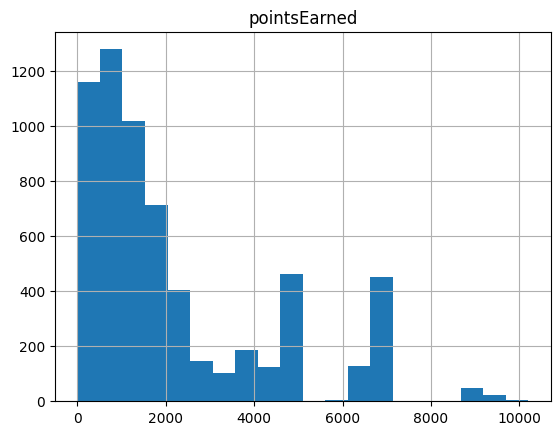

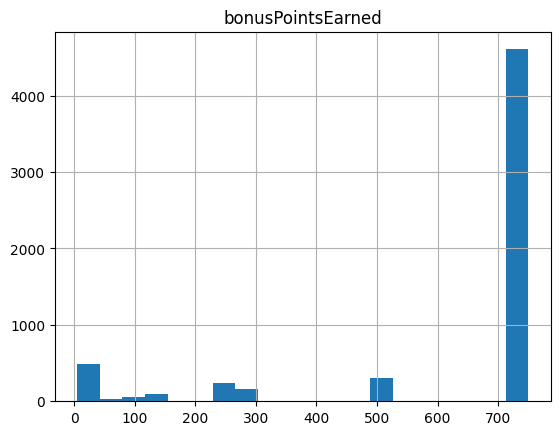

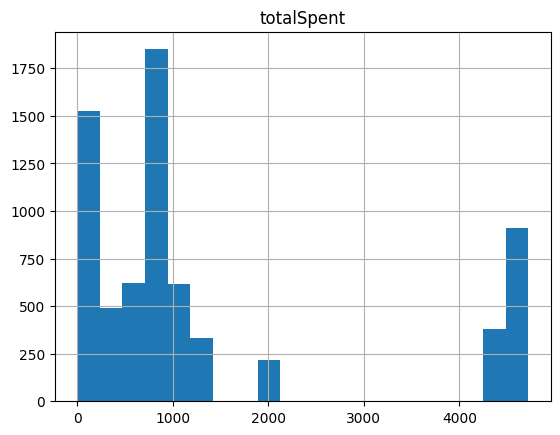

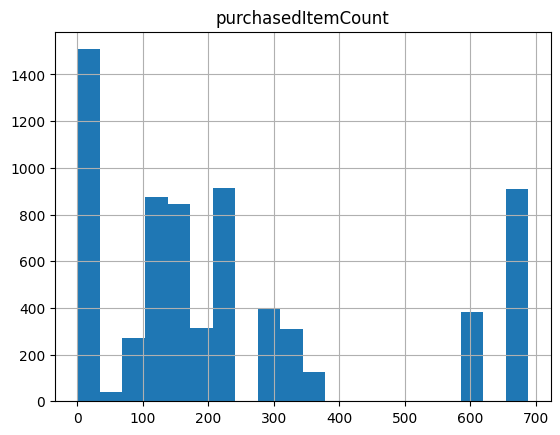

In [86]:
receipts[['pointsEarned']].hist(bins=20)
receipts[['bonusPointsEarned']].hist(bins=20)
receipts[['totalSpent']].hist(bins=20)
receipts[['purchasedItemCount']].hist(bins=20)


### SQL Queries ( 2 examples)

In [87]:
import pandasql

In [88]:
#3 
query3 = """
SELECT
    rewardsReceiptStatus,
    COALESCE(AVG(totalSpent),0) AS average_spend
FROM
    receipts
where
rewardsReceiptStatus IN ('FINISHED', 'REJECTED') 
GROUP BY
    rewardsReceiptStatus
    
"""
#using FINISHED for ACCEPTED
result3 = pandasql.sqldf(query3, locals())
print(result3)

  rewardsReceiptStatus  average_spend
0             FINISHED    1244.793472
1             REJECTED      19.902500


In [89]:
#4
query4 = """
SELECT
    rewardsReceiptStatus,
    COALESCE(SUM(purchasedItemCount),0) AS total_items_purchased
FROM
    receipts
WHERE
    rewardsReceiptStatus IN ('FINISHED', 'REJECTED')
GROUP BY
    rewardsReceiptStatus
    """
#using FINISHED for ACCEPTED
result4 = pandasql.sqldf(query4, locals())
print(result4)

  rewardsReceiptStatus  total_items_purchased
0             FINISHED              1364998.0
1             REJECTED                  740.0


In [90]:
query6 = """ 
WITH MaxCreatedDate AS (
    SELECT MAX(created_Date) AS max_date
    FROM users
),
FilteredUsers AS (
    SELECT u.id, u.created_Date
    FROM users u, MaxCreatedDate m
    WHERE u.created_Date >= datetime(m.max_date, '-6 months')
)
SELECT 
    b.name AS brand_name,
    COUNT(ri.id) AS transaction_count
FROM 
    FilteredUsers u
JOIN 
    receipts r ON u.id = r.userId
JOIN 
    items ri ON r.id = ri.id
JOIN 
    brands b ON ri.barcode = b.barcode
GROUP BY 
    b.name
ORDER BY 
    transaction_count DESC
LIMIT 1;

"""


result6 = pandasql.sqldf(query6, locals())
print(result6)

  brand_name  transaction_count
0   Tostitos               5118
